<a href="https://colab.research.google.com/github/dineshnain00/Machine-learning-Model/blob/main/Accuracy_visualization_%2Cbar_reports_%26Machine_learning_Model_on_dataset2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


=== Holdout Test Results ===

Model: Naive Bayes
Accuracy : 0.625
Precision: 0.725
Recall   : 0.625
F1 Score : 0.6116071428571428
Confusion Matrix:
 [[0 1 0]
 [0 2 0]
 [0 2 3]]
--------------------------------------------------
Model: Decision Tree
Accuracy : 0.375
Precision: 0.375
Recall   : 0.375
F1 Score : 0.375
Confusion Matrix:
 [[0 1 0]
 [0 0 2]
 [1 1 3]]
--------------------------------------------------
Model: Random Forest
Accuracy : 0.5
Precision: 0.41666666666666663
Recall   : 0.5
F1 Score : 0.4545454545454546
Confusion Matrix:
 [[0 1 0]
 [0 0 2]
 [0 1 4]]
--------------------------------------------------
Model: Logistic Regression
Accuracy : 0.5
Precision: 0.53125
Recall   : 0.5
F1 Score : 0.49999999999999994
Confusion Matrix:
 [[0 1 0]
 [0 1 1]
 [0 2 3]]
--------------------------------------------------
Model: SVM
Accuracy : 0.625
Precision: 0.390625
Recall   : 0.625
F1 Score : 0.4807692307692308
Confusion Matrix:
 [[0 0 1]
 [0 0 2]
 [0 0 5]]
---------------------------

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Model: Random Forest
CV Mean Accuracy: 0.55
CV Std Dev      : 0.12747548783981963
Fold Scores     : [0.5   0.625 0.75  0.5   0.375]
--------------------------------------------------
Model: Logistic Regression
CV Mean Accuracy: 0.65
CV Std Dev      : 0.1224744871391589
Fold Scores     : [0.5   0.875 0.625 0.625 0.625]
--------------------------------------------------


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Model: SVM
CV Mean Accuracy: 0.625
CV Std Dev      : 0.07905694150420949
Fold Scores     : [0.75  0.625 0.625 0.625 0.5  ]
--------------------------------------------------


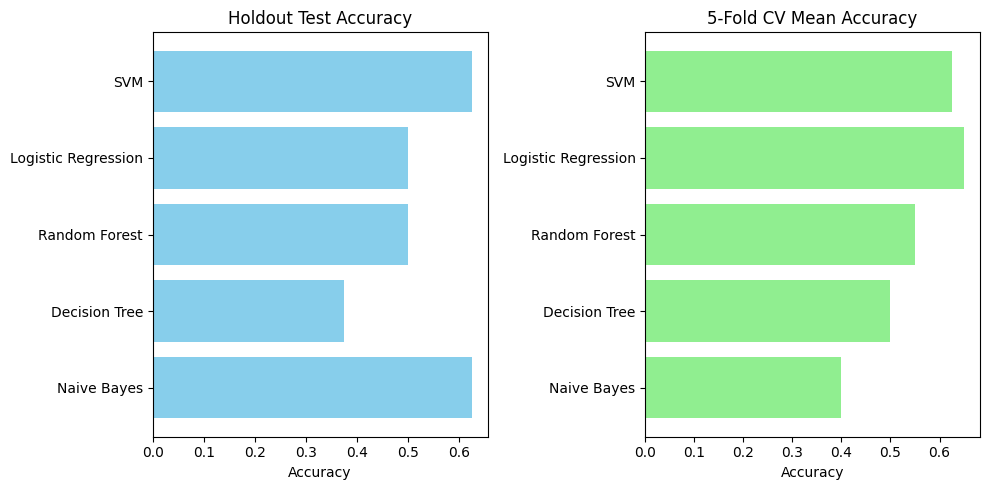


✅ Accuracy comparison saved as 'model_accuracy_comparison.png'
✅ Confusion matrices saved as 'confusion_matrix_<model>.png'


In [2]:

#----------------Accuracy Visualization of a data set----------------------


import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# =======================
# 1. Load Dataset
# =======================
df = pd.read_csv("dataset2.csv")

# Target column (Objective)
y = df["What are your savings objectives?"]
X = df.drop(columns=["What are your savings objectives?"])

# =======================
# 2. Preprocessing
# =======================
# Separate categorical and numerical features
cat_features = X.select_dtypes(include=["object"]).columns.tolist()
num_features = X.select_dtypes(exclude=["object"]).columns.tolist()

# Preprocessor: OneHotEncode categorical + scale numerics (for LR & SVM)
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features),
        ("num", StandardScaler(), num_features)
    ]
)

# =======================
# 3. Define Models
# =======================
models = {
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(kernel="rbf", probability=True, random_state=42)
}

# =======================
# 4. Train/Test Split
# =======================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# =======================
# 5. Evaluation on Holdout Test
# =======================
print("\n=== Holdout Test Results ===\n")
holdout_results = {}

for name, model in models.items():
    clf = Pipeline(steps=[("preprocessor", preprocessor),
                         ("classifier", model)])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    holdout_results[name] = acc

    print(f"Model: {name}")
    print("Accuracy :", acc)
    print("Precision:", precision_score(y_test, y_pred, average="weighted", zero_division=0))
    print("Recall   :", recall_score(y_test, y_pred, average="weighted", zero_division=0))
    print("F1 Score :", f1_score(y_test, y_pred, average="weighted", zero_division=0))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("-" * 50)

    # === Save Confusion Matrix Plot ===
    cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot(cmap="Blues", xticks_rotation=45)
    plt.title(f"Confusion Matrix - {name}")
    plt.tight_layout()
    plt.savefig(f"confusion_matrix_{name.replace(' ', '_').lower()}.png", dpi=300)
    plt.close()

# =======================
# 6. Cross-Validation
# =======================
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = {}

print("\n=== 5-Fold Cross-Validation Results ===\n")
for name, model in models.items():
    clf = Pipeline(steps=[("preprocessor", preprocessor),
                         ("classifier", model)])
    scores = cross_val_score(clf, X, y, cv=cv, scoring="accuracy")
    cv_results[name] = np.mean(scores)

    print(f"Model: {name}")
    print("CV Mean Accuracy:", np.mean(scores))
    print("CV Std Dev      :", np.std(scores))
    print("Fold Scores     :", scores)
    print("-" * 50)

# =======================
# 7. Plot & Save Accuracy Comparison
# =======================
plt.figure(figsize=(10,5))

# Holdout Test Accuracy
plt.subplot(1,2,1)
plt.barh(list(holdout_results.keys()), list(holdout_results.values()), color="skyblue")
plt.title("Holdout Test Accuracy")
plt.xlabel("Accuracy")

# Cross-Validation Mean Accuracy
plt.subplot(1,2,2)
plt.barh(list(cv_results.keys()), list(cv_results.values()), color="lightgreen")
plt.title("5-Fold CV Mean Accuracy")
plt.xlabel("Accuracy")

plt.tight_layout()
plt.savefig("model_accuracy_comparison.png", dpi=300)  # Save plot as PNG
plt.show()

print("\n✅ Accuracy comparison saved as 'model_accuracy_comparison.png'")
print("✅ Confusion matrices saved as 'confusion_matrix_<model>.png'")


=== Holdout Test Results ===

Model: Naive Bayes
Accuracy : 0.625
Precision: 0.725
Recall   : 0.625
F1 Score : 0.6116071428571428
Confusion Matrix:
 [[0 1 0]
 [0 2 0]
 [0 2 3]]
--------------------------------------------------
Model: Decision Tree
Accuracy : 0.375
Precision: 0.375
Recall   : 0.375
F1 Score : 0.375
Confusion Matrix:
 [[0 1 0]
 [0 0 2]
 [1 1 3]]
--------------------------------------------------
Model: Random Forest
Accuracy : 0.5
Precision: 0.41666666666666663
Recall   : 0.5
F1 Score : 0.4545454545454546
Confusion Matrix:
 [[0 1 0]
 [0 0 2]
 [0 1 4]]
--------------------------------------------------
Model: Logistic Regression
Accuracy : 0.5
Precision: 0.53125
Recall   : 0.5
F1 Score : 0.49999999999999994
Confusion Matrix:
 [[0 1 0]
 [0 1 1]
 [0 2 3]]
--------------------------------------------------
Model: SVM
Accuracy : 0.625
Precision: 0.390625
Recall   : 0.625
F1 Score : 0.4807692307692308
Confusion Matrix:
 [[0 0 1]
 [0 0 2]
 [0 0 5]]
---------------------------

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Model: Decision Tree
CV Mean Accuracy: 0.5
CV Std Dev      : 0.13693063937629152
Fold Scores     : [0.5   0.375 0.75  0.5   0.375]
--------------------------------------------------


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Model: Random Forest
CV Mean Accuracy: 0.55
CV Std Dev      : 0.12747548783981963
Fold Scores     : [0.5   0.625 0.75  0.5   0.375]
--------------------------------------------------
Model: Logistic Regression
CV Mean Accuracy: 0.65
CV Std Dev      : 0.1224744871391589
Fold Scores     : [0.5   0.875 0.625 0.625 0.625]
--------------------------------------------------


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Model: SVM
CV Mean Accuracy: 0.625
CV Std Dev      : 0.07905694150420949
Fold Scores     : [0.75  0.625 0.625 0.625 0.5  ]
--------------------------------------------------


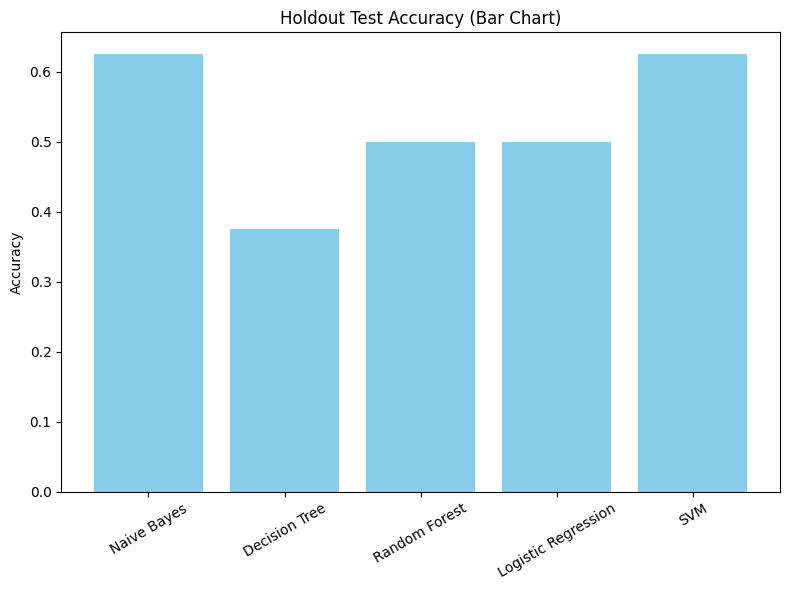

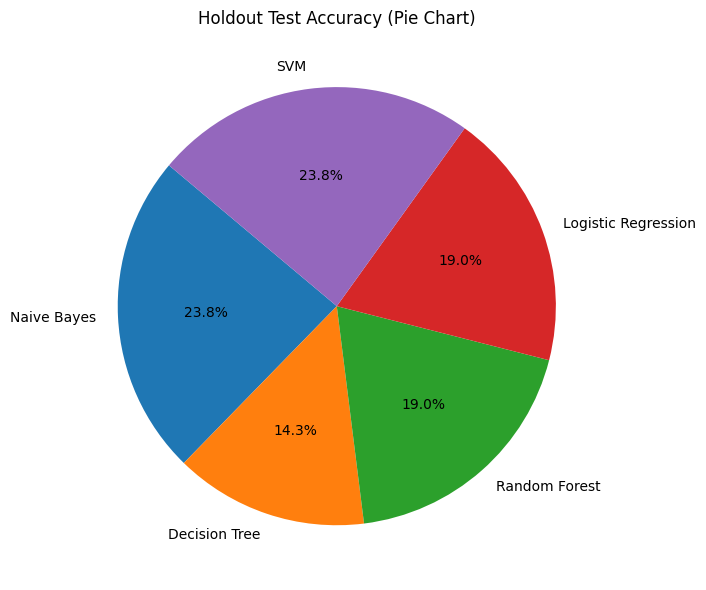

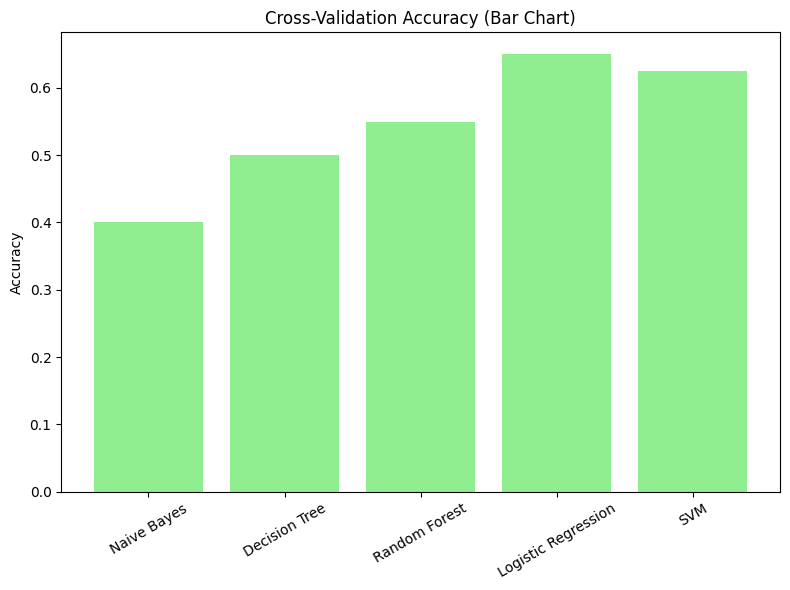

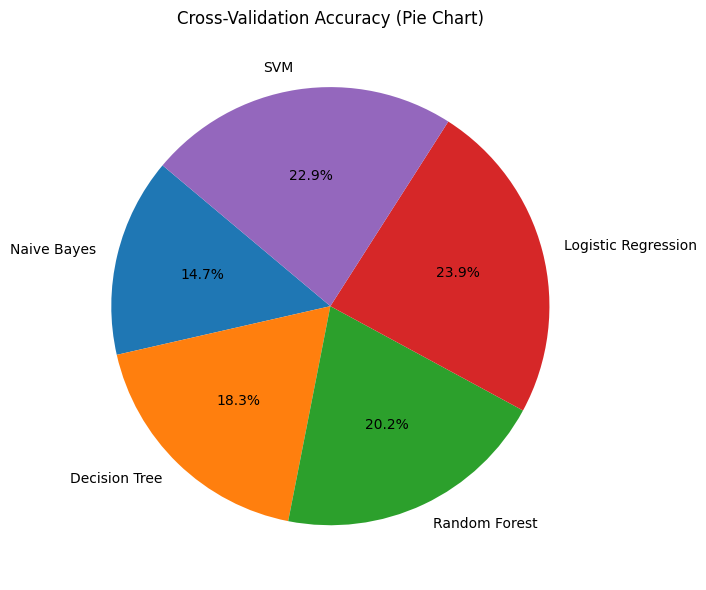


✅ All visualizations saved:
 - holdout_accuracy_bar.png
 - holdout_accuracy_pie.png
 - cv_accuracy_bar.png
 - cv_accuracy_pie.png
 - confusion_matrix_<model>.png (for each model)


In [4]:
#----------------------Accuracy bar reports --------------


import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# =======================
# 1. Load Dataset
# =======================
df = pd.read_csv("dataset2.csv")

# Target column (Objective)
y = df["What are your savings objectives?"]
X = df.drop(columns=["What are your savings objectives?"])

# =======================
# 2. Preprocessing
# =======================
cat_features = X.select_dtypes(include=["object"]).columns.tolist()
num_features = X.select_dtypes(exclude=["object"]).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features),
        ("num", StandardScaler(), num_features)
    ]
)

# =======================
# 3. Define Models
# =======================
models = {
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(kernel="rbf", probability=True, random_state=42)
}

# =======================
# 4. Train/Test Split
# =======================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# =======================
# 5. Holdout Test Results
# =======================
print("\n=== Holdout Test Results ===\n")
holdout_results = {}

for name, model in models.items():
    clf = Pipeline(steps=[("preprocessor", preprocessor),
                         ("classifier", model)])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    holdout_results[name] = acc

    print(f"Model: {name}")
    print("Accuracy :", acc)
    print("Precision:", precision_score(y_test, y_pred, average="weighted", zero_division=0))
    print("Recall   :", recall_score(y_test, y_pred, average="weighted", zero_division=0))
    print("F1 Score :", f1_score(y_test, y_pred, average="weighted", zero_division=0))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("-" * 50)

    # Save Confusion Matrix Plot
    cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot(cmap="Blues", xticks_rotation=45)
    plt.title(f"Confusion Matrix - {name}")
    plt.tight_layout()
    plt.savefig(f"confusion_matrix_{name.replace(' ', '_').lower()}.png", dpi=300)
    plt.close()

# =======================
# 6. Cross-Validation Results
# =======================
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = {}

print("\n=== 5-Fold Cross-Validation Results ===\n")
for name, model in models.items():
    clf = Pipeline(steps=[("preprocessor", preprocessor),
                         ("classifier", model)])
    scores = cross_val_score(clf, X, y, cv=cv, scoring="accuracy")
    cv_results[name] = np.mean(scores)

    print(f"Model: {name}")
    print("CV Mean Accuracy:", np.mean(scores))
    print("CV Std Dev      :", np.std(scores))
    print("Fold Scores     :", scores)
    print("-" * 50)

# =======================
# 7. Visualization (Bar + Pie)
# =======================
# ---- Holdout Bar ----
plt.figure(figsize=(8,6))
plt.bar(holdout_results.keys(), holdout_results.values(), color="skyblue")
plt.title("Holdout Test Accuracy (Bar Chart)")
plt.ylabel("Accuracy")
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig("holdout_accuracy_bar.png", dpi=300)
plt.show()

# ---- Holdout Pie ----
plt.figure(figsize=(8,6))
plt.pie(holdout_results.values(), labels=holdout_results.keys(), autopct='%1.1f%%', startangle=140)
plt.title("Holdout Test Accuracy (Pie Chart)")
plt.tight_layout()
plt.savefig("holdout_accuracy_pie.png", dpi=300)
plt.show()

# ---- CV Bar ----
plt.figure(figsize=(8,6))
plt.bar(cv_results.keys(), cv_results.values(), color="lightgreen")
plt.title("Cross-Validation Accuracy (Bar Chart)")
plt.ylabel("Accuracy")
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig("cv_accuracy_bar.png", dpi=300)
plt.show()

# ---- CV Pie ----
plt.figure(figsize=(8,6))
plt.pie(cv_results.values(), labels=cv_results.keys(), autopct='%1.1f%%', startangle=140)
plt.title("Cross-Validation Accuracy (Pie Chart)")
plt.tight_layout()
plt.savefig("cv_accuracy_pie.png", dpi=300)
plt.show()

print("\n✅ All visualizations saved:")
print(" - holdout_accuracy_bar.png")
print(" - holdout_accuracy_pie.png")
print(" - cv_accuracy_bar.png")
print(" - cv_accuracy_pie.png")
print(" - confusion_matrix_<model>.png (for each model)")

In [6]:
#&&&&&&&&&&&&&&&&&&&& Machine Learning Model for a Dataset। &&&&&&&&&&&&&&&&&&&

import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Data Collection
df = pd.read_csv("dataset2.csv")  # to read the file
print(df)

## Data Preprocessing
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['gender'] = le.fit_transform(df['gender'])
df['Equity_Market'] = le.fit_transform(df['Equity_Market'])
df['Mutual_Funds'] = le.fit_transform(df['Mutual_Funds'])
df['Fixed_Deposits'] = le.fit_transform(df['Fixed_Deposits'])
df['Source'] = le.fit_transform(df['Source'])

print(df)
x = df.drop(columns=['Objective'])  # Input - X
y = df['Objective']                # Output - Y

print("XXXX", x)
print("YYYY", y)


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)  # split the val

##Train - 80% input data
## y_train - 80% output data
## X_test - 20% input data
## Y_test - 20% output data

print("DF", df.shape)
print("x_train", x_train.shape)
print("x_test", x_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

from sklearn.naive_bayes import GaussianNB
# Encode categorical columns
le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':   # if column is text
        df[col] = le.fit_transform(df[col])

# Now select features and target
X = df.drop("Objective", axis=1)  # features
y = df["Objective"]               # target (also categorical)

# Encode target as well
y = le.fit_transform(y)

# Split and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = GaussianNB()
model.fit(X_train, y_train)

print("Accuracy:", model.score(X_test, y_test))

# Model Prediction
testPrediction = model.predict([[9,5,2,5,4,6,1,2,5,4,7,6,8,9,6,6,5,6,3,6,8,7,4]])
if testPrediction == 1:
    print("Awesome running")
else:
    print("Bad for wealth")

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder ,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# =======================
# 1. Load Dataset
# =======================
df = pd.read_csv("dataset2.csv")

# Target column (Objective)
y = df["What are your savings objectives?"]
X = df.drop(columns=["What are your savings objectives?"])

# =======================
# 2. Preprocessing
# =======================
# Separate categorical and numerical features
cat_features = X.select_dtypes(include=["object"]).columns.tolist()
num_features = X.select_dtypes(exclude=["object"]).columns.tolist()

# Transformer: OneHot for categorical+ scale  numerics (better for LR & SVM)
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features),
        ("num",StandardScaler(), num_features)
    ]
)

# =======================
# 3. Define Models
# =======================
models = {
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(kernel="rbf", probability=True, random_state=42)

}

# =======================
# 4. Train/Test Split
# =======================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# =======================
# 5. Evaluation on Holdout Test
# =======================
print("\n=== Holdout Test Results ===\n")
for name, model in models.items():
    clf = Pipeline(steps=[("preprocessor", preprocessor),
                         ("classifier", model)])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print(f"Model: {name}")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average="weighted", zero_division=0))
    print("Recall   :", recall_score(y_test, y_pred, average="weighted", zero_division=0))
    print("F1 Score :", f1_score(y_test, y_pred, average="weighted", zero_division=0))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("-" * 50)

# =======================
# 6. Cross-Validation
# =======================
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("\n=== 5-Fold Cross-Validation Results ===\n")
for name, model in models.items():
    clf = Pipeline(steps=[("preprocessor", preprocessor),
                         ("classifier", model)])
    scores = cross_val_score(clf, X, y, cv=cv, scoring="accuracy")
    print(f"Model: {name}")
    print("CV Mean Accuracy:", np.mean(scores))
    print("CV Std Dev      :", np.std(scores))
    print("Fold Scores     :", scores)
    print("-" * 50)

    gender  age Investment_Avenues  Mutual_Funds  Equity_Market  Debentures  \
0   Female   34                Yes             1              2           5   
1   Female   23                Yes             4              3           2   
2     Male   30                Yes             3              6           4   
3     Male   22                Yes             2              1           3   
4   Female   24                 No             2              1           3   
5   Female   24                 No             7              5           4   
6   Female   27                Yes             3              6           4   
7     Male   21                Yes             2              3           7   
8     Male   35                Yes             2              4           7   
9     Male   31                Yes             1              3           7   
10  Female   35                Yes             2              4           7   
11    Male   29                Yes             2    